# FLIM analysis quick and dirty

data from 16/06/23

control = Clover only

condition = SUN1/TM-FS1-CC1

(FS1 = Clover-TS-mRuby2)


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image
import os
import seaborn as sns
from skimage import io, color



In [3]:
Folder = '/Users/christine/Documents/Data/DynamoLINC/FLIM/FLIM_230616/'

ls = os.listdir(Folder)
ls

names=[]
for f in range(len(ls)):
    before, sep, after = ls[i].partition ('.')
    names.append(before)
    
files = np.unique(names)

files=list(filter(None,files))
files

['CD150_1',
 'CD150_2',
 'CD150_3',
 'CD150_FRET_1_Ch1',
 'CD150_FRET_1_Ch2',
 'CD150_FRET_2_Ch1',
 'CD150_FRET_2_Ch2',
 'CD150_FRET_3_Ch1',
 'CD150_FRET_3_Ch2',
 'CD153_1',
 'CD153_1_Ch1',
 'CD153_1_Ch2',
 'CD153_2_Ch1',
 'CD153_2_Ch2',
 'CD153_3',
 'CD153_3_Ch1',
 'CD153_3_Ch2',
 'CD153_4',
 'CD153_4_Ch1',
 'CD153_4_Ch2']

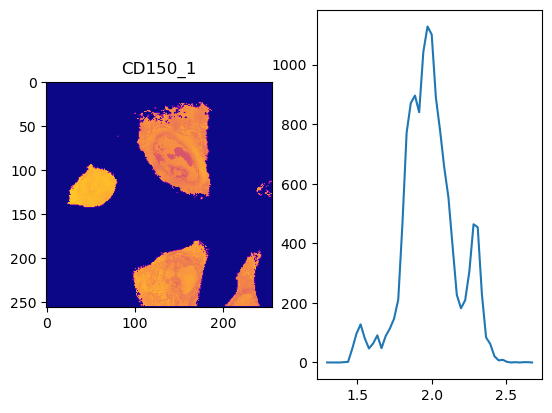

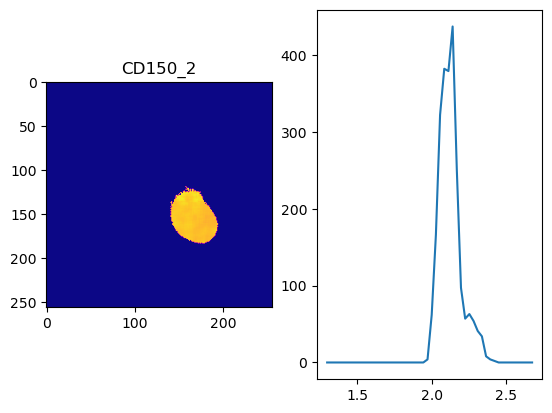

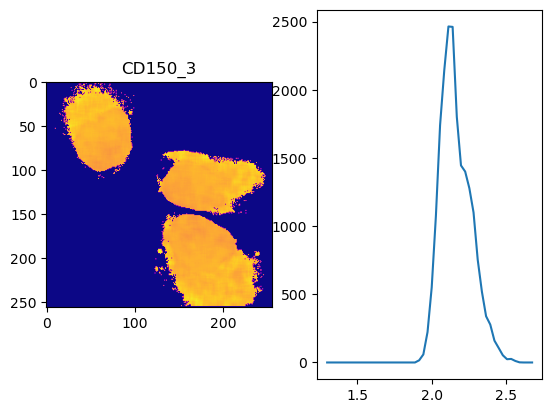

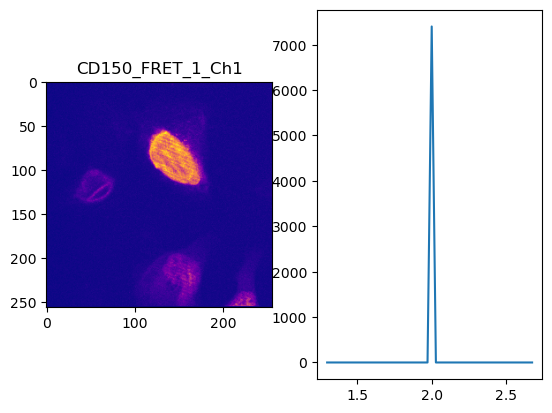

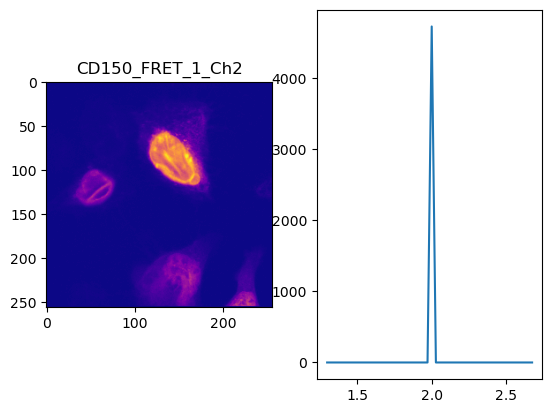

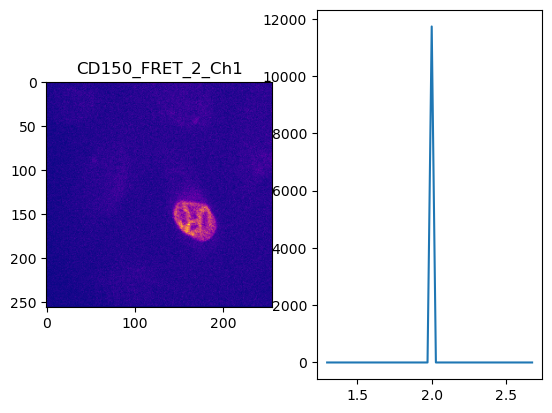

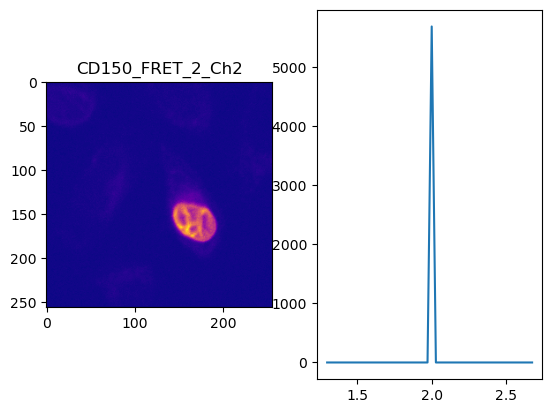

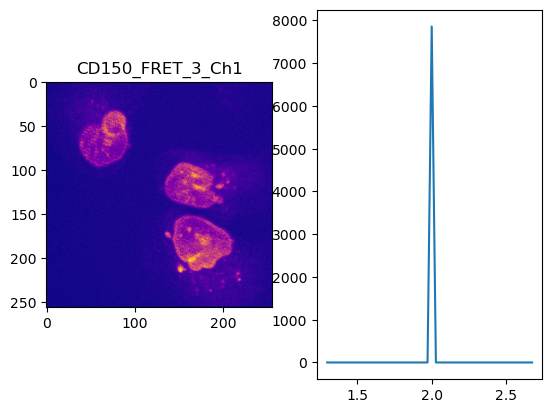

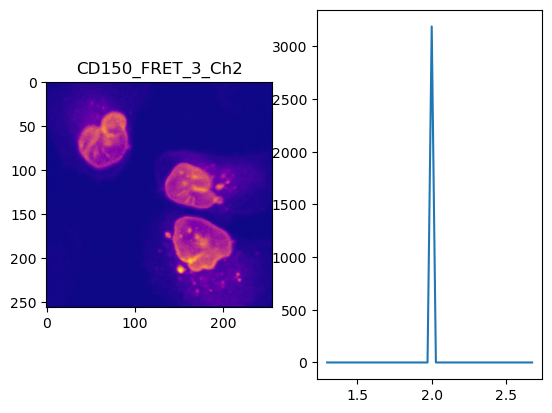

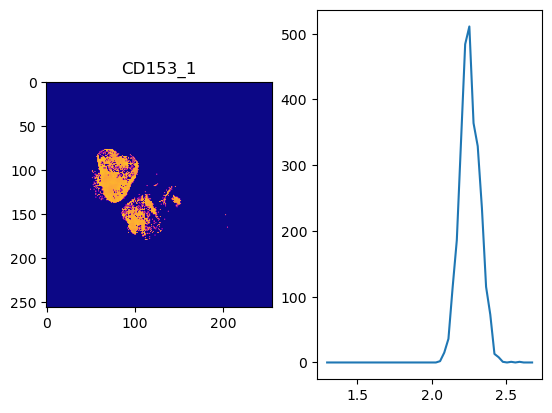

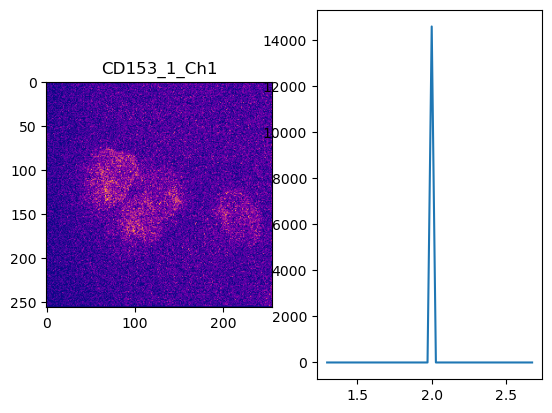

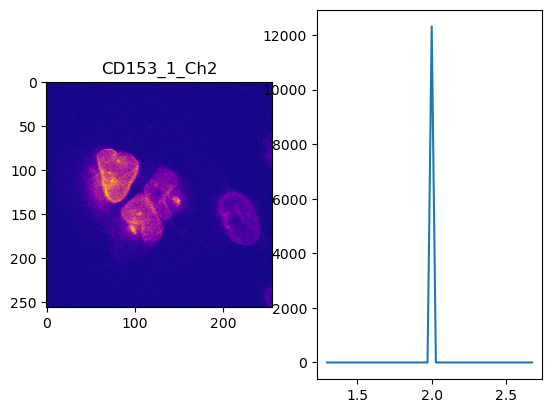

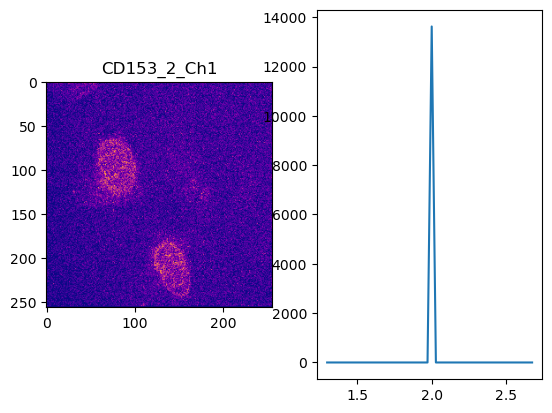

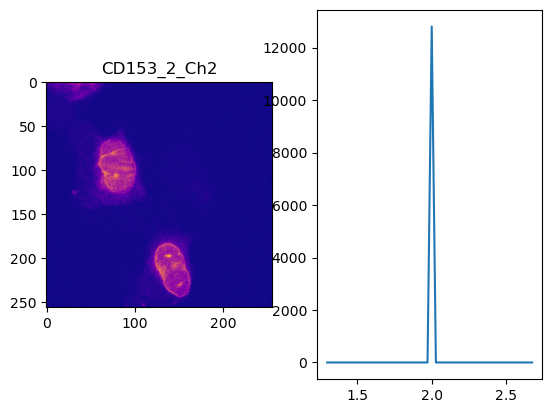

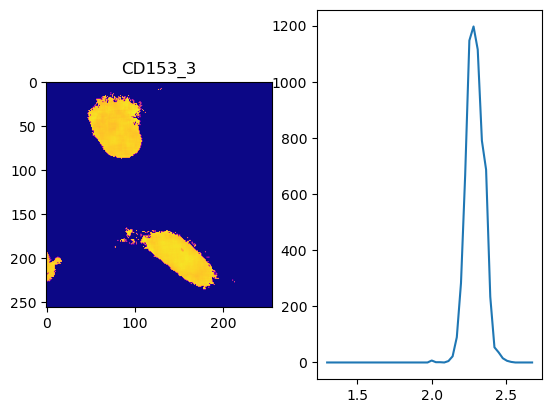

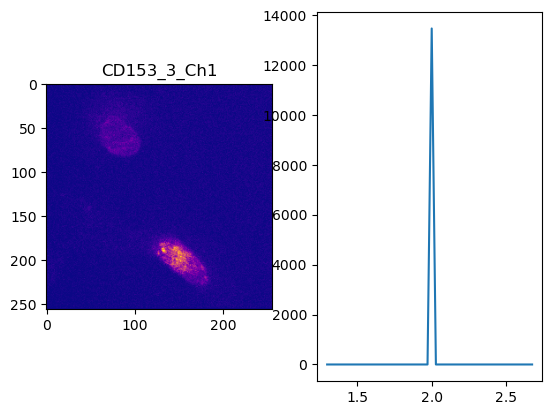

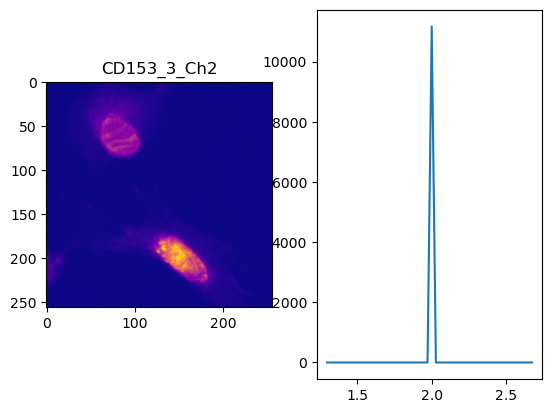

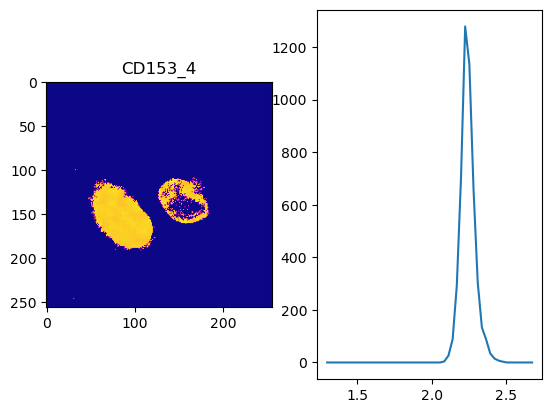

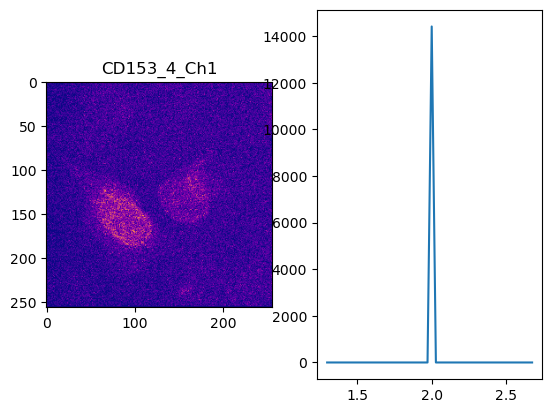

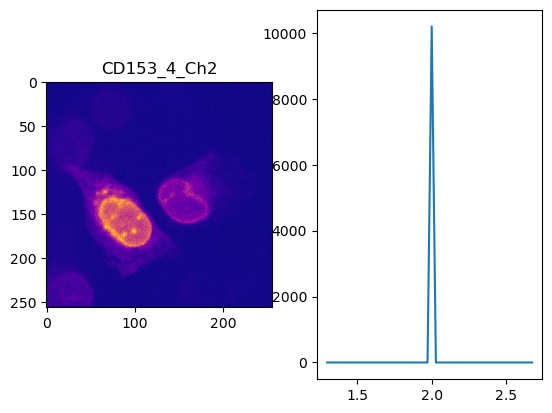

In [4]:
minval = 1.3
maxval = 2.7


for f in files:
    img = io.imread(Folder+f+'.tif').astype(float)
    histogram, bin_edges = np.histogram(img, bins=50, range=(minval, maxval))
    
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2)
    ax0.imshow(img, cmap='plasma')
    ax0.set_title(f)
    ax1.plot(bin_edges[0:-1], histogram)
    plt.savefig('/Users/christine/Documents/Data/DynamoLINC/FLIM/Results/'+f+'_histo.tif')







CD150_FRET_1_Ch2
CD150_FRET_2_Ch1
CD150_FRET_2_Ch2
CD150_2
CD150_3
CD150_FRET_1_Ch1


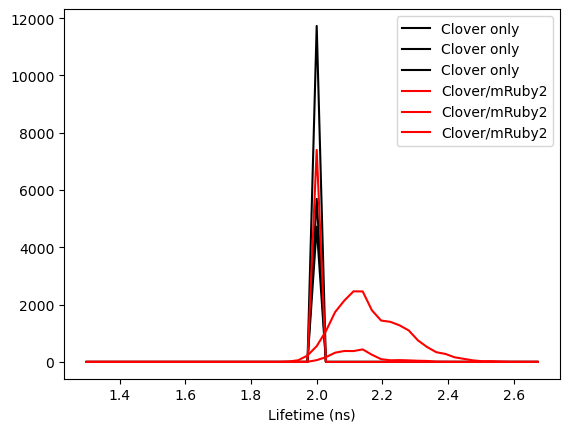

In [6]:
fig, ax = plt.subplots()

for i in range(4,7):
    f = files[i]
    print(f)
    img = io.imread(Folder+f+'.tif').astype(float)
    histogram, bin_edges = np.histogram(img, bins=50, range=(minval, maxval))
    ax.plot(bin_edges[0:-1], histogram, 'k',label='Clover only' )
    
for i in range(1,4):
    f = files[i]
    print(f)
    img = io.imread(Folder+f+'.tif').astype(float)
    histogram, bin_edges = np.histogram(img, bins=50, range=(minval, maxval))
    ax.plot(bin_edges[0:-1], histogram, 'r',label='Clover/mRuby2' )
ax.legend()
ax.set_xlabel('Lifetime (ns)')
plt.savefig('/Users/christine/Documents/Data/DynamoLINC/FLIM/Results/histograms.tif')